In [389]:
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [390]:
# load sklearn dataset
data=pd.read_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_50F_OneHote.csv', low_memory=False)

In [391]:
data.head()

,Unnamed: 0,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,...,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Normal,Reconnaissance,Shellcode,Worms
0,0,0.036133,528,304,31,29,0,0,87676.08594,50480.17188,...,0,0,0,0,0,0,1,0,0,0
1,1,0.001119,146,178,31,29,0,0,521894.53130,636282.37500,...,0,0,0,0,0,0,1,0,0,0
2,2,0.001209,132,164,31,29,0,0,436724.56250,542597.18750,...,0,0,0,0,0,0,1,0,0,0
3,3,0.001169,146,178,31,29,0,0,499572.25000,609067.56250,...,0,0,0,0,0,0,1,0,0,0
4,4,0.078339,568,312,31,29,0,0,43503.23438,23896.14258,...,0,0,0,0,0,0,1,0,0,0


In [392]:
data.shape

(700000, 51)

In [371]:
# Balance Dataset into Normal and Abnormal

In [393]:
data_normal=data.loc[data['Normal']==1]

In [394]:
data_normal.shape

(677785, 51)

In [395]:
data_normal.head()

,Unnamed: 0,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,...,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Normal,Reconnaissance,Shellcode,Worms
0,0,0.036133,528,304,31,29,0,0,87676.08594,50480.17188,...,0,0,0,0,0,0,1,0,0,0
1,1,0.001119,146,178,31,29,0,0,521894.53130,636282.37500,...,0,0,0,0,0,0,1,0,0,0
2,2,0.001209,132,164,31,29,0,0,436724.56250,542597.18750,...,0,0,0,0,0,0,1,0,0,0
3,3,0.001169,146,178,31,29,0,0,499572.25000,609067.56250,...,0,0,0,0,0,0,1,0,0,0
4,4,0.078339,568,312,31,29,0,0,43503.23438,23896.14258,...,0,0,0,0,0,0,1,0,0,0


In [396]:
data_normal.columns

Index(['Unnamed: 0', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb',
       'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit',
       'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
       'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')

In [397]:
data_normal=data_normal.drop([' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic','Reconnaissance', 'Shellcode', 'Worms'], axis=1)

In [398]:
data_normal.shape

(677785, 42)

In [399]:
data_normal=data_normal.to_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_Normal_OneHot.csv')

In [400]:
data_anormal=data.loc[data['Normal']==0]

In [401]:
data_anormal.shape

(22215, 51)

In [402]:
data_anormal.columns

Index(['Unnamed: 0', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb',
       'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit',
       'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
       'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       ' Fuzzers', 'Analysis', 'Backdoors', 'DoS', 'Exploits', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'],
      dtype='object')

In [403]:
data_anormal=data_anormal.drop(['Normal'], axis=1)

In [405]:
data_anormal=data_anormal.to_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_Anormal_OneHot.csv')

PermissionError: [Errno 13] Permission denied: 'E:\\My Drive\\UNSW-NB15 Dataset\\StabdardizedDatasetXY\\UNSW-NB15_1NN_Anormal_OneHot.csv'

# Drop 10 features from Normal dataset based on SFS

In [406]:
data_normal=pd.read_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_Normal_OneHot.csv',low_memory=False)

In [407]:
#Select the first 40 columns as features 
X_1=data_normal.iloc[:,:40]
#Slecte the 41-50 columns as targets 
y_1=data_normal.iloc[:,-1]

In [408]:
X_1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl',
       'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
       'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm'],
      dtype='object')

In [409]:
# Drop index 8, 13, 14, 18, 21, 24, 25, 32, 39, 40
Data_normal_New=data_normal.drop(['Sload','dwin', 'stcpb','trans_depth','Djit','Sintpkt', 'Dintpkt','is_ftp_login','ct_src_dport_ltm'],axis=1)

In [410]:
Data_normal_New.shape

(677785, 34)

In [411]:
Data_normal_New.head()

,Unnamed: 0,Unnamed: 0.1,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Dload,...,ct_state_ttl,ct_flw_http_mthd,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Normal
0,0,0,0.036133,528,304,31,29,0,0,50480.17188,...,0,0,0,2,4,2,3,1,2,1
1,1,1,0.001119,146,178,31,29,0,0,636282.37500,...,0,0,0,12,8,1,2,1,1,1
2,2,2,0.001209,132,164,31,29,0,0,542597.18750,...,0,0,0,6,9,1,1,1,1,1
3,3,3,0.001169,146,178,31,29,0,0,609067.56250,...,0,0,0,7,9,1,1,1,1,1
4,4,4,0.078339,568,312,31,29,0,0,23896.14258,...,0,0,0,2,4,2,3,1,2,1


In [412]:
Data_normal_New=Data_normal_New.drop([ 'Unnamed: 0.1'],axis=1)

In [413]:
Data_normal_New=Data_normal_New.drop([ 'Unnamed: 0'],axis=1)

In [414]:
Data_normal_New.shape

(677785, 32)

In [415]:
Data_normal_New.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Dload,Spkts,Dpkts,...,ct_state_ttl,ct_flw_http_mthd,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Normal
0,0.036133,528,304,31,29,0,0,50480.17188,4,4,...,0,0,0,2,4,2,3,1,2,1
1,0.001119,146,178,31,29,0,0,636282.37500,2,2,...,0,0,0,12,8,1,2,1,1,1
2,0.001209,132,164,31,29,0,0,542597.18750,2,2,...,0,0,0,6,9,1,1,1,1,1
3,0.001169,146,178,31,29,0,0,609067.56250,2,2,...,0,0,0,7,9,1,1,1,1,1
4,0.078339,568,312,31,29,0,0,23896.14258,4,4,...,0,0,0,2,4,2,3,1,2,1


In [416]:
Data_normal_New.columns

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dtcpb', 'smeansz', 'dmeansz', 'res_bdy_len',
       'Sjit', 'Stime', 'Ltime', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Normal'],
      dtype='object')

In [417]:
#Select the first 31 columns as features 
X_1=Data_normal_New.iloc[:,:31]
#Slecte the 41-50 columns as targets 
y_1=Data_normal_New.iloc[:,-1]

In [418]:
y_1

0         1
1         1
2         1
3         1
4         1
         ..
677780    1
677781    1
677782    1
677783    1
677784    1
Name: Normal, Length: 677785, dtype: int64

In [419]:
X_1=X_1.to_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_X_1_OneHot.csv')

In [420]:
X_1=pd.read_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_X_1_OneHot.csv',low_memory=False)

# Load ANormal Dataset

In [421]:
data_anormal=pd.read_csv(r'E:\My Drive\UNSW-NB15 Dataset\StabdardizedDatasetXY\UNSW-NB15_1NN_Anormal_OneHot.csv')

In [422]:
data_anormal.head()

,Unnamed: 0,Unnamed: 0.1,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,...,ct_dst_src_ltm,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Reconnaissance,Shellcode,Worms
0,19,19,0.000021,728,0,254,0,0,0,1.386667e+08,...,1,0,0,0,0,1,0,0,0,0
1,20,20,0.240139,918,25552,62,252,2,10,2.805042e+04,...,1,0,0,0,0,1,0,0,0,0
2,21,21,2.390390,1362,268,254,252,6,1,4.233619e+03,...,1,0,0,0,0,0,0,1,0,0
3,38,38,0.175190,8168,268,254,252,4,1,3.463668e+05,...,1,0,0,0,0,1,0,0,0,0
4,39,39,0.190600,844,268,254,252,2,1,3.189927e+04,...,1,0,0,0,0,1,0,0,0,0


In [423]:
data_anormal.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl',
       'sloss', 'dloss', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
       'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
       'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src',
       'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', ' Fuzzers', 'Analysis',
       'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms'],
      dtype='object')

In [424]:
# Drop Anomaly Dataset into 31 Features also 
# Drop index 8, 13, 14, 18, 21, 24, 25, 32, 39, 40
Data_anormal_New=data_anormal.drop(['Sload','dwin', 'stcpb','trans_depth','Djit','Sintpkt', 'Dintpkt','is_ftp_login','ct_src_dport_ltm'],axis=1)

In [425]:
Data_anormal_New.shape

(22215, 42)

In [426]:
Data_anormal_New.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl',
       'sloss', 'dloss', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dtcpb', 'smeansz',
       'dmeansz', 'res_bdy_len', 'Sjit', 'Stime', 'Ltime', 'tcprtt', 'synack',
       'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', ' Fuzzers', 'Analysis',
       'Backdoors', 'DoS', 'Exploits', 'Generic', 'Reconnaissance',
       'Shellcode', 'Worms'],
      dtype='object')

In [427]:
Data_anormal_New=Data_anormal_New.drop([ 'Unnamed: 0','Unnamed: 0.1'],axis=1)

In [428]:
Data_anormal_New.shape

(22215, 40)

In [429]:
Data_anormal_New.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Dload,Spkts,Dpkts,...,ct_dst_src_ltm,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Reconnaissance,Shellcode,Worms
0,0.000021,728,0,254,0,0,0,0.000000,2,0,...,1,0,0,0,0,1,0,0,0,0
1,0.240139,918,25552,62,252,2,10,815794.187500,12,24,...,1,0,0,0,0,1,0,0,0,0
2,2.390390,1362,268,254,252,6,1,749.668518,14,6,...,1,0,0,0,0,0,0,1,0,0
3,0.175190,8168,268,254,252,4,1,10228.894530,14,6,...,1,0,0,0,0,1,0,0,0,0
4,0.190600,844,268,254,252,2,1,9401.888672,10,6,...,1,0,0,0,0,1,0,0,0,0


In [430]:
#Select the first 31 columns as features 
X_1=Data_normal_New.iloc[:,:31]
#Slecte the 41-50 columns as targets 
y_1=Data_normal_New.iloc[:,-1]

In [431]:
#Select the first 40 columns as features 
X_2=Data_anormal_New.iloc[:,:31]
#Slecte the 41-50 columns as targets 
y_2=Data_anormal_New.iloc[:,31:40]

In [432]:
X_2

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Dload,Spkts,Dpkts,...,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,0.000021,728,0,254,0,0,0,0.000000,2,0,...,0,2,0,0,1,1,1,1,1,1
1,0.240139,918,25552,62,252,2,10,815794.187500,12,24,...,0,1,1,0,3,2,2,1,1,1
2,2.390390,1362,268,254,252,6,1,749.668518,14,6,...,0,1,1,0,5,2,2,1,1,1
3,0.175190,8168,268,254,252,4,1,10228.894530,14,6,...,0,1,0,0,1,1,1,1,1,1
4,0.190600,844,268,254,252,2,1,9401.888672,10,6,...,0,1,1,0,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22210,31.461020,924,708,254,252,2,1,168.843857,16,16,...,0,1,0,0,6,6,2,2,1,2
22211,57.995934,1362,536,254,252,6,1,67.866829,20,12,...,0,1,0,0,6,6,2,2,1,2
22212,32.361782,1128,622,254,252,6,1,142.884598,18,14,...,0,1,0,0,6,6,2,2,1,2
22213,0.476639,470,354,254,252,1,1,6915.086426,8,8,...,0,1,0,0,8,8,2,2,1,2


In [433]:
y_2

,Fuzzers,Analysis,Backdoors,DoS,Exploits,Generic,Reconnaissance,Shellcode,Worms
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
22210,1,0,0,0,0,0,0,0,0
22211,1,0,0,0,0,0,0,0,0
22212,1,0,0,0,0,0,0,0,0
22213,1,0,0,0,0,0,0,0,0


# PCA Dimensionality Reduciton Based on # 31 Feaures
# Normal Activity 

In [434]:
# Data stadanrdisation 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [435]:
X_1=np.array(X_1)
X_1

array([[3.6133e-02, 5.2800e+02, 3.0400e+02, ..., 3.0000e+00, 1.0000e+00,
        2.0000e+00],
       [1.1190e-03, 1.4600e+02, 1.7800e+02, ..., 2.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.2090e-03, 1.3200e+02, 1.6400e+02, ..., 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       ...,
       [7.1080e-03, 2.1580e+03, 2.4640e+03, ..., 7.0000e+00, 1.0000e+00,
        2.0000e+00],
       [4.4350e-03, 5.6800e+02, 3.0400e+02, ..., 5.0000e+00, 1.0000e+00,
        3.0000e+00],
       [7.2974e-02, 4.2380e+03, 6.0788e+04, ..., 7.0000e+00, 1.0000e+00,
        2.0000e+00]])

In [436]:
y_1=np.array(y_1)

In [437]:
X_2=np.array(X_2)
X_2

array([[2.1000000e-05, 7.2800000e+02, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [2.4013900e-01, 9.1800000e+02, 2.5552000e+04, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [2.3903900e+00, 1.3620000e+03, 2.6800000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [3.2361782e+01, 1.1280000e+03, 6.2200000e+02, ..., 2.0000000e+00,
        1.0000000e+00, 2.0000000e+00],
       [4.7663900e-01, 4.7000000e+02, 3.5400000e+02, ..., 2.0000000e+00,
        1.0000000e+00, 2.0000000e+00],
       [3.4343100e-01, 5.5000000e+02, 2.6800000e+02, ..., 3.0000000e+00,
        1.0000000e+00, 3.0000000e+00]])

In [438]:
y_2=np.array(y_2)

In [439]:
#Standardizing the features
X_1=StandardScaler().fit_transform(X_1)
X_1

array([[-0.03101792, -0.32008321, -0.26430713, ..., -0.40326412,
        -0.26522393, -0.07546912],
       [-0.03234724, -0.34907416, -0.26498279, ..., -0.63999641,
        -0.26522393, -0.52870577],
       [-0.03234382, -0.35013666, -0.26505786, ..., -0.8767287 ,
        -0.26522393, -0.52870577],
       ...,
       [-0.03211986, -0.19637838, -0.25272444, ...,  0.54366505,
        -0.26522393, -0.07546912],
       [-0.03222134, -0.31704751, -0.26430713, ...,  0.07020047,
        -0.26522393,  0.37776754],
       [-0.02961924, -0.0385219 ,  0.06002974, ...,  0.54366505,
        -0.26522393, -0.07546912]])

In [440]:
X_2=StandardScaler().fit_transform(X_2)
X_2

array([[-0.22178396, -0.05116214, -0.05839909, ..., -0.94960919,
        -0.75735414, -0.81833853],
       [-0.17650699, -0.05037428,  0.09388357, ..., -0.94960919,
        -0.75735414, -0.81833853],
       [ 0.22894725, -0.04853316, -0.05680189, ..., -0.94960919,
        -0.75735414, -0.81833853],
       ...,
       [ 5.8803935 , -0.04950348, -0.05469215, ..., -0.58505654,
        -0.75735414, -0.37527376],
       [-0.13191222, -0.05223198, -0.05628936, ..., -0.58505654,
        -0.75735414, -0.37527376],
       [-0.15703011, -0.05190025, -0.05680189, ..., -0.22050389,
        -0.75735414,  0.067791  ]])

In [441]:
# Normal Activity Data PCA Dimensionality Reduction 

In [468]:
#29 Features 
pca = PCA(n_components=29)
principalComponents_normal_29 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([1.81232295e-01, 1.24959364e-01, 1.09833441e-01, 6.71027579e-02,
       6.46284264e-02, 6.14125455e-02, 4.67569024e-02, 4.23202428e-02,
       3.69171219e-02, 3.23248668e-02, 3.04333462e-02, 2.85064611e-02,
       2.21072304e-02, 2.18393958e-02, 1.93263240e-02, 1.84560048e-02,
       1.58264624e-02, 1.46828682e-02, 1.15818869e-02, 9.82588860e-03,
       8.72078893e-03, 8.61531445e-03, 6.33481376e-03, 6.28513331e-03,
       5.95279559e-03, 3.79268153e-03, 1.96015303e-04, 2.05429185e-05,
       7.71762109e-06])

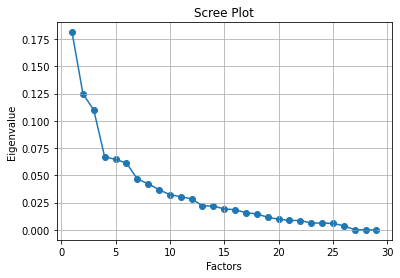

In [469]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,30),importance)
plt.plot(range(1,30),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

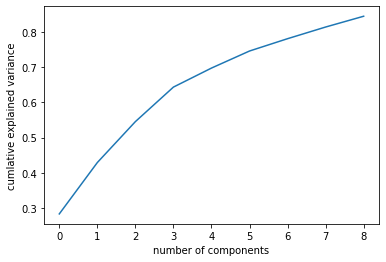

In [443]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [267]:
a=np.cumsum(pca.explained_variance_ratio_)
a

array([0.1812323 , 0.30619166, 0.4160251 , 0.48312786, 0.54775628,
       0.60916883, 0.65592573, 0.69824598, 0.7351631 , 0.76748796,
       0.79792131, 0.82642777, 0.848535  , 0.8703744 , 0.88970072,
       0.90815673, 0.92398319, 0.93866606, 0.95024794, 0.96007383,
       0.96879462, 0.97740994, 0.98374475, 0.99002988, 0.99598268,
       0.99977536, 0.99997138, 0.99999192, 0.99999964])

In [ ]:
# Feature 20

In [444]:
pca = PCA(n_components=20)
principalComponents_normal_20 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.1812323 , 0.12495936, 0.10983344, 0.06710276, 0.06462843,
       0.06141255, 0.0467569 , 0.04232024, 0.03691712, 0.03232487,
       0.03043335, 0.02850646, 0.02210723, 0.0218394 , 0.01932632,
       0.018456  , 0.01582646, 0.01468287, 0.01158189, 0.00982589])

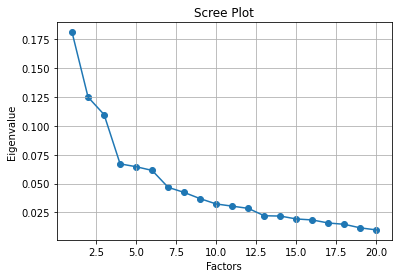

In [445]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,21),importance)
plt.plot(range(1,21),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

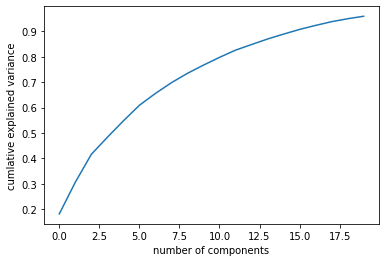

In [446]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [447]:
b=np.cumsum(pca.explained_variance_ratio_)
b

array([0.1812323 , 0.30619166, 0.4160251 , 0.48312786, 0.54775628,
       0.60916883, 0.65592573, 0.69824598, 0.7351631 , 0.76748796,
       0.79792131, 0.82642777, 0.848535  , 0.8703744 , 0.88970072,
       0.90815673, 0.92398319, 0.93866606, 0.95024794, 0.96007383])

In [ ]:
# Normal Feature 16

In [448]:
pca = PCA(n_components=16)
principalComponents_normal_16 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.1812323 , 0.12495936, 0.10983344, 0.06710276, 0.06462843,
       0.06141255, 0.0467569 , 0.04232024, 0.03691712, 0.03232487,
       0.03043335, 0.02850646, 0.02210723, 0.0218394 , 0.01932632,
       0.018456  ])

In [452]:
print(principalComponents_normal_16.shape)

(677785, 16)


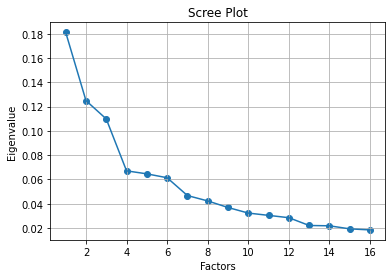

In [450]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,17),importance)
plt.plot(range(1,17),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

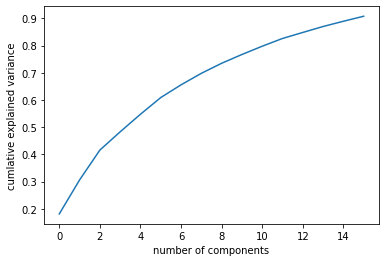

In [453]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [276]:
c=np.cumsum(pca.explained_variance_ratio_)
c

array([0.1812323 , 0.30619166, 0.4160251 , 0.48312786, 0.54775628,
       0.60916883, 0.65592573, 0.69824598, 0.7351631 , 0.76748796,
       0.79792131, 0.82642777, 0.848535  , 0.8703744 , 0.88970072,
       0.90815673, 0.92398319, 0.93866606])

In [ ]:
# Normal Feature 15

In [454]:
pca = PCA(n_components=15)
principalComponents_normal_15 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.1812323 , 0.12495936, 0.10983344, 0.06710276, 0.06462843,
       0.06141255, 0.0467569 , 0.04232024, 0.03691712, 0.03232487,
       0.03043335, 0.02850646, 0.02210723, 0.02183939, 0.01932632])

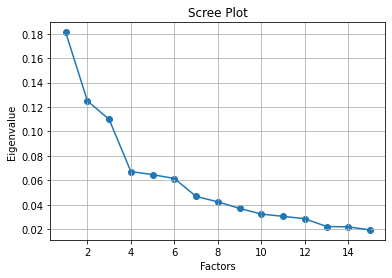

In [455]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,16),importance)
plt.plot(range(1,16),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

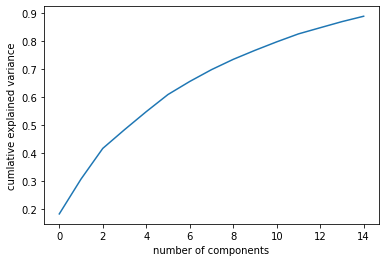

In [456]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [457]:
d=np.cumsum(pca.explained_variance_ratio_)
d

array([0.1812323 , 0.30619166, 0.4160251 , 0.48312786, 0.54775628,
       0.60916883, 0.65592573, 0.69824598, 0.7351631 , 0.76748796,
       0.79792131, 0.82642777, 0.848535  , 0.8703744 , 0.88970072])

In [281]:
#Normal Feature 13

In [462]:
pca = PCA(n_components=13)
principalComponents_normal_13 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.1812323 , 0.12495936, 0.10983344, 0.06710276, 0.06462843,
       0.06141255, 0.0467569 , 0.04232024, 0.0369171 , 0.03232461,
       0.0304331 , 0.02850642, 0.02210691])

In [463]:
print(principalComponents_normal_13.shape)

(677785, 13)


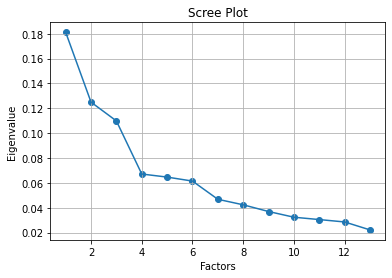

In [464]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,14),importance)
plt.plot(range(1,14),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

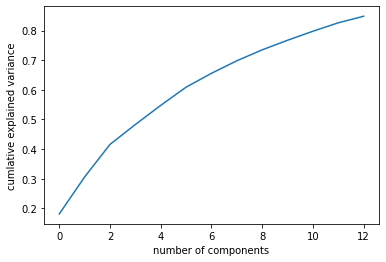

In [465]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [466]:
e=np.cumsum(pca.explained_variance_ratio_)
e

array([0.1812323 , 0.30619166, 0.4160251 , 0.48312786, 0.54775628,
       0.60916883, 0.65592573, 0.69824597, 0.73516307, 0.76748767,
       0.79792078, 0.8264272 , 0.84853411])

In [470]:
#Feature 12 
pca = PCA(n_components=12)
principalComponents_normal_12 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.1812323 , 0.12495936, 0.10983344, 0.06710276, 0.06462843,
       0.06141255, 0.0467569 , 0.04232024, 0.03691712, 0.03232487,
       0.03043327, 0.02850639])

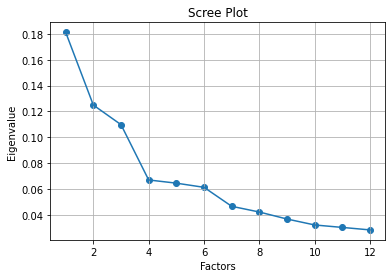

In [471]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,13),importance)
plt.plot(range(1,13),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

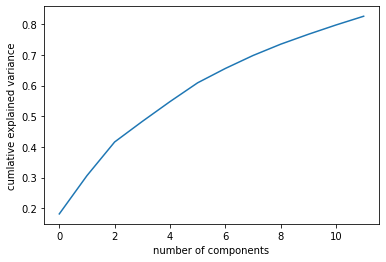

In [472]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [473]:
f=np.cumsum(pca.explained_variance_ratio_)
f

array([0.1812323 , 0.30619166, 0.4160251 , 0.48312786, 0.54775628,
       0.60916883, 0.65592573, 0.69824597, 0.73516309, 0.76748796,
       0.79792123, 0.82642762])

In [474]:
#Feature 9
pca = PCA(n_components=9)
principalComponents_normal_9 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.1812323 , 0.12495936, 0.10983344, 0.06710276, 0.06462842,
       0.06141253, 0.04675676, 0.0423202 , 0.03691677])

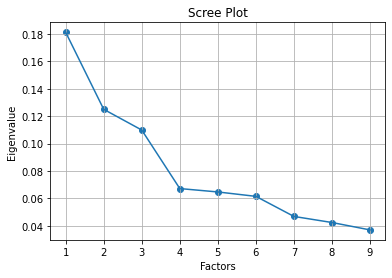

In [475]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,10),importance)
plt.plot(range(1,10),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

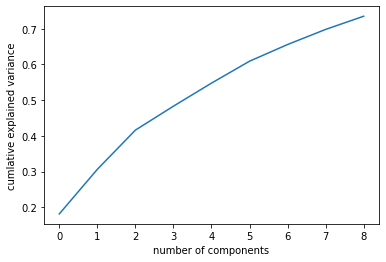

In [476]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [477]:
g=np.cumsum(pca.explained_variance_ratio_)
g

array([0.1812323 , 0.30619166, 0.4160251 , 0.48312786, 0.54775628,
       0.60916881, 0.65592556, 0.69824577, 0.73516253])

In [478]:
#Feature 8
pca = PCA(n_components=8)
principalComponents_normal_8 = pca.fit_transform(X_1)
pca.explained_variance_ratio_

array([0.1812323 , 0.12495936, 0.10983344, 0.06710275, 0.06462842,
       0.06141252, 0.0467569 , 0.04231917])

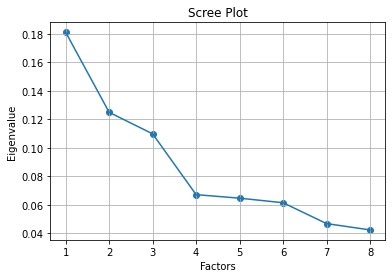

In [479]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,9),importance)
plt.plot(range(1,9),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

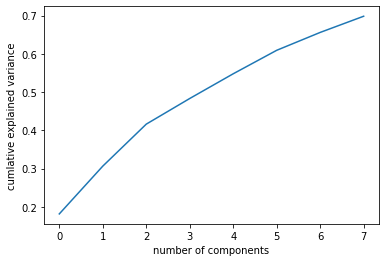

In [480]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [481]:
h=np.cumsum(pca.explained_variance_ratio_)
h

array([0.1812323 , 0.30619166, 0.4160251 , 0.48312785, 0.54775627,
       0.60916878, 0.65592568, 0.69824485])

# PCA Dimensionality Reduciton Based on # 31 Feaures
# Anormal Activity 

In [ ]:
# 29 Feature 

In [485]:
pca = PCA(n_components=29)
principalComponents_anormal_29 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([3.17078727e-01, 1.21201511e-01, 1.01120235e-01, 7.07976970e-02,
       6.02579771e-02, 5.21253038e-02, 3.60748027e-02, 3.41119923e-02,
       3.13555546e-02, 2.91749233e-02, 2.68783460e-02, 2.38666888e-02,
       2.17286390e-02, 1.70902935e-02, 1.58325108e-02, 9.47793135e-03,
       8.68997119e-03, 6.54033977e-03, 5.57190432e-03, 4.69593542e-03,
       3.57821722e-03, 1.62274382e-03, 8.12196336e-04, 1.45825555e-04,
       8.31340238e-05, 4.16994572e-05, 2.95027533e-05, 1.53949763e-05,
       1.57437218e-09])

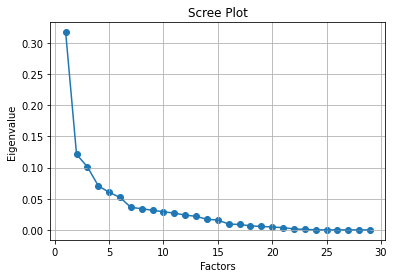

In [486]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,30),importance)
plt.plot(range(1,30),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

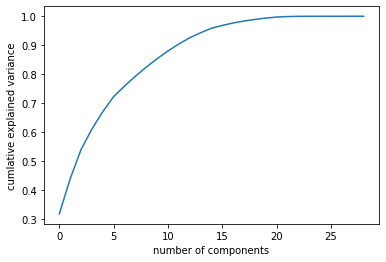

In [487]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [488]:
a_1=np.cumsum(pca.explained_variance_ratio_)
a_1

array([0.31707873, 0.43828024, 0.53940047, 0.61019817, 0.67045615,
       0.72258145, 0.75865625, 0.79276825, 0.8241238 , 0.85329872,
       0.88017707, 0.90404376, 0.9257724 , 0.94286269, 0.9586952 ,
       0.96817313, 0.9768631 , 0.98340344, 0.98897535, 0.99367128,
       0.9972495 , 0.99887225, 0.99968444, 0.99983027, 0.9999134 ,
       0.9999551 , 0.9999846 , 1.        , 1.        ])

In [489]:
#Feature 20

In [490]:
pca = PCA(n_components=20)
principalComponents_anormal_20 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.31707873, 0.12120151, 0.10112024, 0.0707977 , 0.06025798,
       0.0521253 , 0.0360748 , 0.03411199, 0.03135555, 0.02917492,
       0.02687835, 0.02386669, 0.02172864, 0.01709029, 0.01583251,
       0.00947793, 0.00868997, 0.00654034, 0.0055719 , 0.00469594])

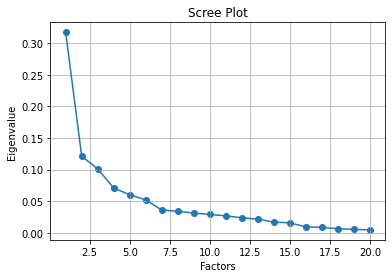

In [491]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,21),importance)
plt.plot(range(1,21),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

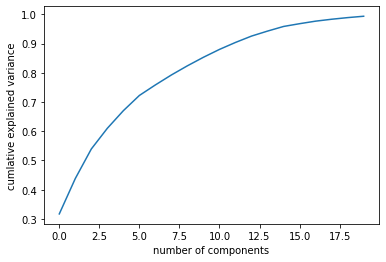

In [492]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [493]:
b_1=np.cumsum(pca.explained_variance_ratio_)
b_1

array([0.31707873, 0.43828024, 0.53940047, 0.61019817, 0.67045615,
       0.72258145, 0.75865625, 0.79276825, 0.8241238 , 0.85329872,
       0.88017707, 0.90404376, 0.9257724 , 0.94286269, 0.9586952 ,
       0.96817313, 0.9768631 , 0.98340344, 0.98897535, 0.99367128])

In [494]:
#16 Feature 

In [495]:
pca = PCA(n_components=16)
principalComponents_anormal_18 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.31707873, 0.12120151, 0.10112024, 0.0707977 , 0.06025798,
       0.0521253 , 0.0360748 , 0.03411199, 0.03135555, 0.02917492,
       0.02687835, 0.02386669, 0.02172864, 0.01709029, 0.01583251,
       0.00947793])

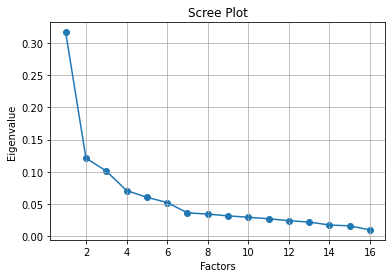

In [496]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,17),importance)
plt.plot(range(1,17),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

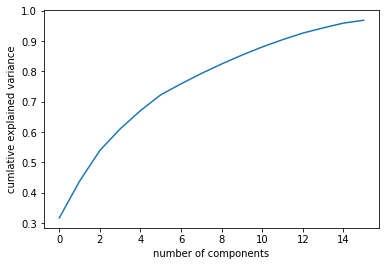

In [497]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [498]:
print(principalComponents_normal_18.shape)

(22215, 18)


In [499]:
c_1=np.cumsum(pca.explained_variance_ratio_)
c_1

array([0.31707873, 0.43828024, 0.53940047, 0.61019817, 0.67045615,
       0.72258145, 0.75865625, 0.79276825, 0.8241238 , 0.85329872,
       0.88017707, 0.90404376, 0.9257724 , 0.94286269, 0.9586952 ,
       0.96817313])

In [500]:
#15 Feature 

In [501]:
pca = PCA(n_components=15)
principalComponents_anormal_15 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.31707873, 0.12120151, 0.10112024, 0.0707977 , 0.06025798,
       0.0521253 , 0.0360748 , 0.03411199, 0.03135555, 0.02917492,
       0.02687835, 0.02386669, 0.02172864, 0.01709029, 0.01583251])

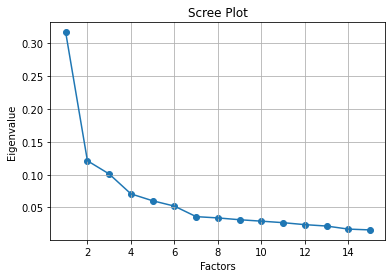

In [502]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,16),importance)
plt.plot(range(1,16),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

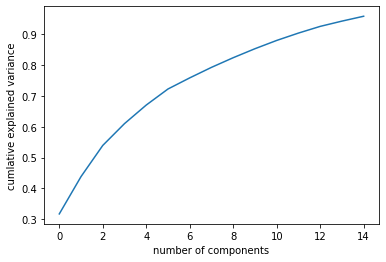

In [503]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [504]:
d_1=np.cumsum(pca.explained_variance_ratio_)
d_1

array([0.31707873, 0.43828024, 0.53940047, 0.61019817, 0.67045615,
       0.72258145, 0.75865625, 0.79276825, 0.8241238 , 0.85329872,
       0.88017707, 0.90404376, 0.9257724 , 0.94286269, 0.9586952 ])

In [505]:
# 13 Feature 

In [506]:
pca = PCA(n_components=13)
principalComponents_anormal_13 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.31707873, 0.12120151, 0.10112024, 0.0707977 , 0.06025798,
       0.0521253 , 0.0360748 , 0.03411199, 0.03135555, 0.02917492,
       0.02687835, 0.02386669, 0.02172864])

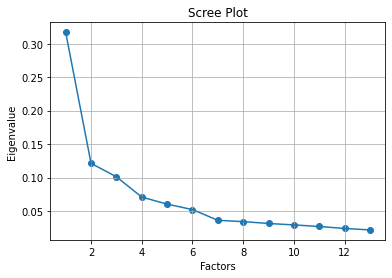

In [507]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,14),importance)
plt.plot(range(1,14),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

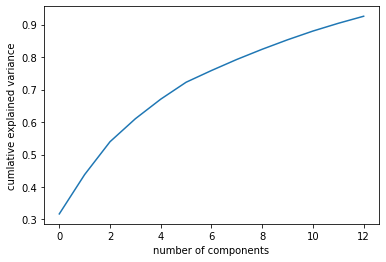

In [508]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [509]:
e_1=np.cumsum(pca.explained_variance_ratio_)
e_1

array([0.31707873, 0.43828024, 0.53940047, 0.61019817, 0.67045615,
       0.72258145, 0.75865625, 0.79276825, 0.8241238 , 0.85329872,
       0.88017707, 0.90404376, 0.9257724 ])

In [510]:
# 12 Feature 
pca = PCA(n_components=12)
principalComponents_anormal_12 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.31707873, 0.12120151, 0.10112024, 0.0707977 , 0.06025798,
       0.0521253 , 0.0360748 , 0.03411199, 0.03135555, 0.02917492,
       0.02687835, 0.02386669])

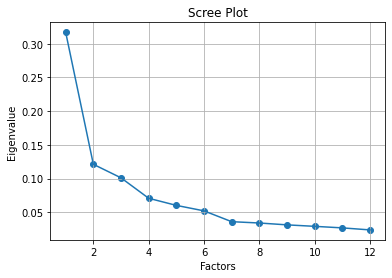

In [511]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,13),importance)
plt.plot(range(1,13),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

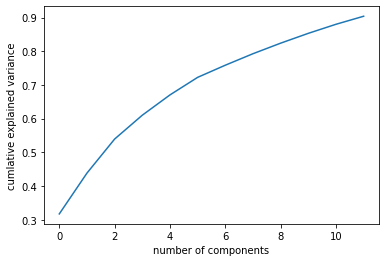

In [512]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [513]:
f_1=np.cumsum(pca.explained_variance_ratio_)
f_1

array([0.31707873, 0.43828024, 0.53940047, 0.61019817, 0.67045615,
       0.72258145, 0.75865625, 0.79276825, 0.8241238 , 0.85329872,
       0.88017707, 0.90404376])

In [514]:
# 9 Feature 

In [515]:
pca = PCA(n_components=9)
principalComponents_anormal_9 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.31707873, 0.12120151, 0.10112024, 0.0707977 , 0.06025798,
       0.0521253 , 0.0360748 , 0.03411199, 0.03135555])

In [516]:
print(principalComponents_normal_9.shape)

(677785, 9)


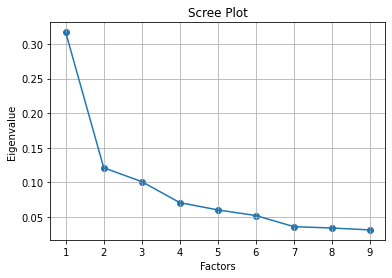

In [517]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,10),importance)
plt.plot(range(1,10),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

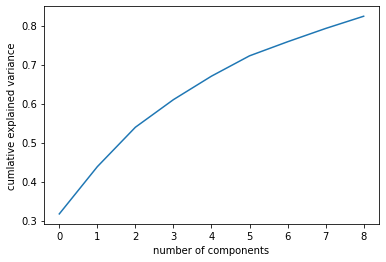

In [518]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [519]:
g_1=np.cumsum(pca.explained_variance_ratio_)
g_1

array([0.31707873, 0.43828024, 0.53940047, 0.61019817, 0.67045615,
       0.72258145, 0.75865625, 0.79276825, 0.8241238 ])

In [520]:
#8 Featurerw

In [521]:
pca = PCA(n_components=8)
principalComponents_anormal_8 = pca.fit_transform(X_2)
pca.explained_variance_ratio_

array([0.31707873, 0.12120151, 0.10112024, 0.0707977 , 0.06025798,
       0.0521253 , 0.0360748 , 0.03411199])

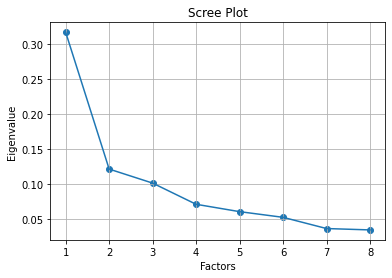

In [522]:
importance = pca.explained_variance_ratio_
plt.scatter(range(1,9),importance)
plt.plot(range(1,9),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Text(0, 0.5, 'cumlative explained variance')

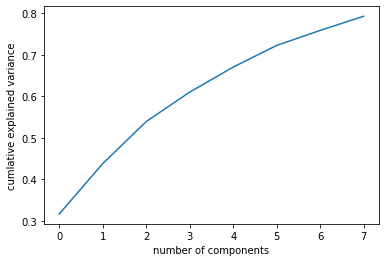

In [523]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumlative explained variance')

In [524]:
h_1=np.cumsum(pca.explained_variance_ratio_)
h_1

array([0.31707873, 0.43828024, 0.53940047, 0.61019817, 0.67045615,
       0.72258145, 0.75865625, 0.79276825])